In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')

In [2]:
churn_df = pd.read_csv('churn.csv')
df = churn_df.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['Churn'].value_counts()*100 / len(df) 

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* Data is <b>imbalanced</b>, ratio =73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace = True)

**Only 11 missings values in TotalCharges columns**

In [10]:
df.duplicated().sum()

0

**No duplicates**

In [11]:
for i in df.columns:
    print(i , df[i].nunique()) 

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


## EDA

Text(0.5, 1.0, 'Monthly_charges')

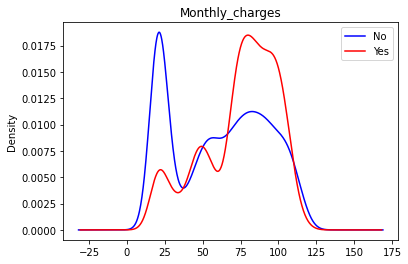

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['Churn']=='No']['MonthlyCharges'].plot(kind='kde', ax=ax , color = 'blue')

# # distribution of the variable after imputation
df[df['Churn']=='Yes']['MonthlyCharges'].plot(kind='kde', ax=ax , color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']
ax.legend(lines, labels, loc='best')

#add title
plt.title('Monthly_charges')

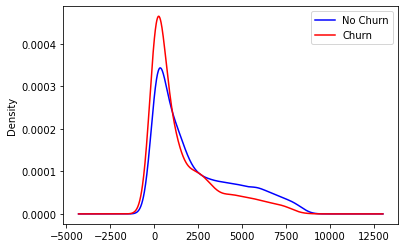

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['TotalCharges'].plot(kind='kde', ax=ax , color = 'blue')

# # distribution of the variable after imputation
df[df['Churn']=='Yes']['TotalCharges'].plot(kind='kde', ax=ax , color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['No Churn', 'Churn']
ax.legend(lines, labels, loc='best')


# # add title
# plt.title('Seller_Type')

In [14]:
df.select_dtypes(exclude = 'O').columns[1:]

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

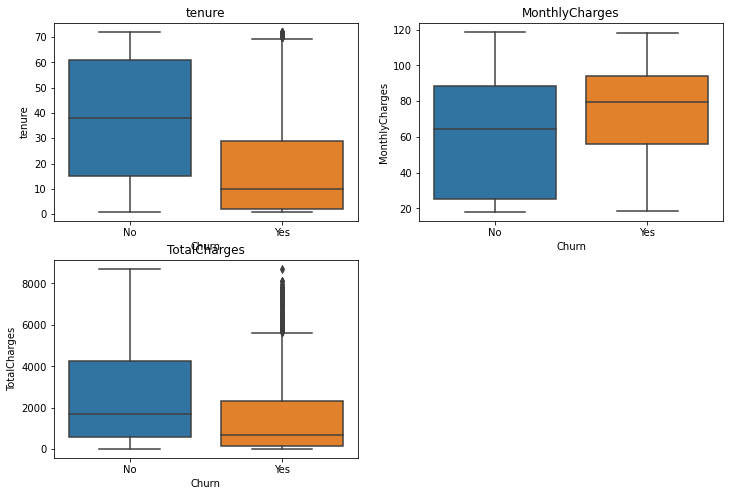

In [15]:
plt.figure(figsize =(12,8))
for i , col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2,2,i+1) 
    sns.boxplot(x = 'Churn' , y = col , data = df )
    plt.title(col) 

**Plot insights:**
- Churning customers have low tenure  with a median of 10 months compared to a median of non-churners of ca. 38 months.
- Churning customers have higher monthly charges with a median of 80 USD compared to a median of non-churners of ca. 65 USD.
- Churning customers have higher monthly charges with a median of 1000 USD compared to a median of non-churners of ca. 1800 USD.

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service' , 'No')

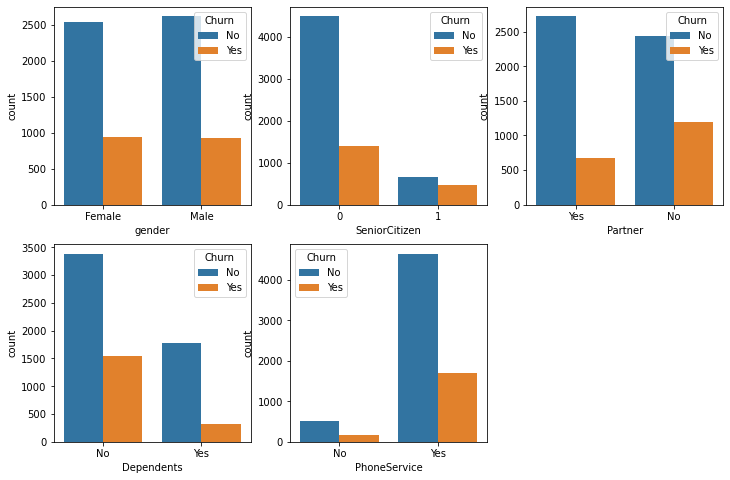

In [18]:
plt.figure(figsize =(12,8))
for i , col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents' ,'PhoneService']):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col , data = df  , hue = 'Churn' ) 

**Plot insights:**
- both gender hava about equal churning rate.
- senior citizen have highest churning rate.
- customers having moderate churning rate wihtout partner.
- customers having highest chruning rate withour dependets.
- customers who subscribe for phone service have highest churn rate.

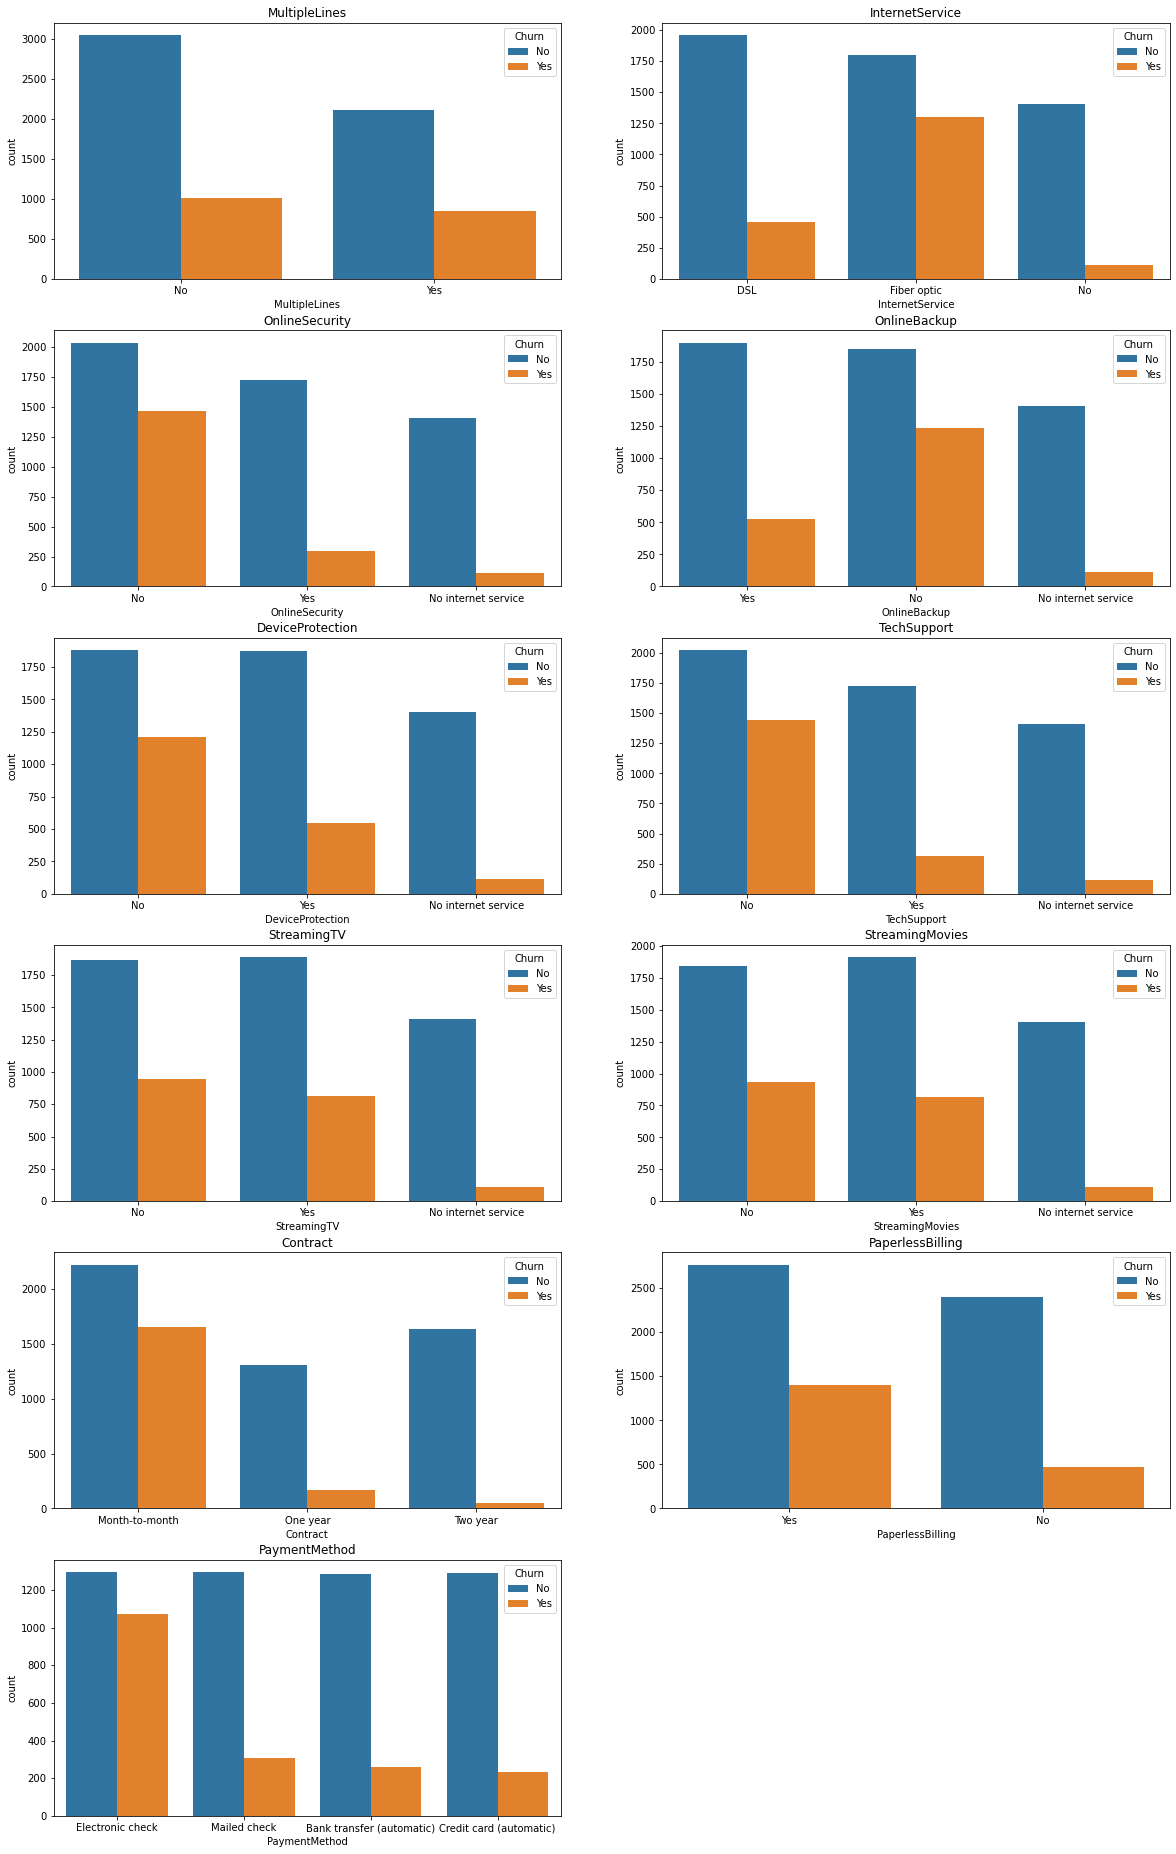

In [19]:
plt.figure(figsize =(20,12))
plt.subplots_adjust(top =2.2)
for i , col in enumerate(['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']):
    plt.subplot(6,2,i+1)
    sns.countplot(x = col , data = df  , hue = 'Churn' ) 
    plt.title(col) 

**Plot Insight**
- Customers with `multiple lines servies` have moderately churning rate.
- Customers with `fibre optic` internet services shows higer churning rate.
- Customers without [`online security` , `Device Pretection` , `Tech support` ,`Online backup`] shows highest churning rate     compared to customers who have online security.
- Customer with `month to month` contract have highest churning rate.
- Customer with `paper less billing` shows higher churning rate.
- Customer with `Electronic check` payment method shows higher churning rate.

## Outliers Treatment

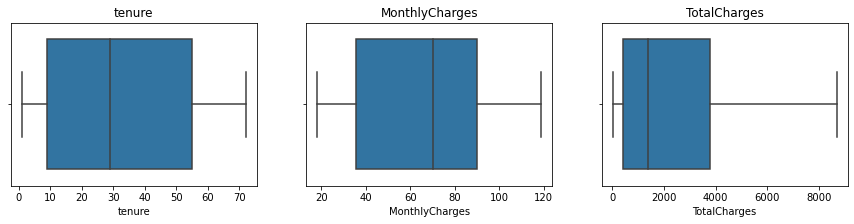

In [20]:
plt.figure(figsize =(15,3))
for i , col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1,3,i+1) 
    sns.boxplot(x = col , data = df )
    plt.title(col) 

**No outliers in numerical features detected**

In [21]:
features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df[features_mms])
scaled_features = pd.DataFrame(rescaled_features , columns = features_mms)
scaled_features.head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


**plots are skewed will have to scaled.**

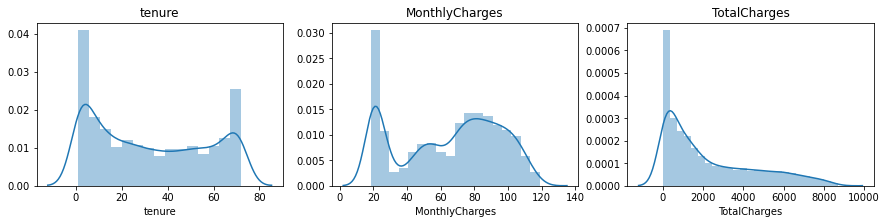

In [22]:
plt.figure(figsize =(15,3))
for i , col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1,3,i+1) 
    sns.distplot(df[col])
    plt.title(col) 

In [23]:
df.drop(labels = ['customerID' ,'tenure', 'MonthlyCharges', 'TotalCharges' ] , axis = 1 , inplace = True)

In [24]:
df = pd.concat([df , scaled_features]  , axis = 1)
df.dropna(inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,Female,0.0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0.000000,0.115423,0.001275
1,Male,0.0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0.464789,0.385075,0.215867
2,Male,0.0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0.014085,0.354229,0.010310
3,Male,0.0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0.619718,0.239303,0.210241
4,Female,0.0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0.014085,0.521891,0.015330


In [25]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [26]:
a = df.nunique() <=2
features_with_two_cat_Valeues = a[a].index

#### Columns with two uniques values mostly Yes or No. so we will use label encoding for these columns.

In [27]:
features_with_two_cat_Valeues

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'PaperlessBilling', 'Churn'],
      dtype='object')

In [28]:
for i in features_with_two_cat_Valeues[2:]:
    df[i] = df[i].map({'Yes':1 , 'No':0})
df['gender'] = df['gender'].map({'Male':1 , 'Female':0})

In [29]:
df = pd.get_dummies(df , drop_first = True)

<AxesSubplot:>

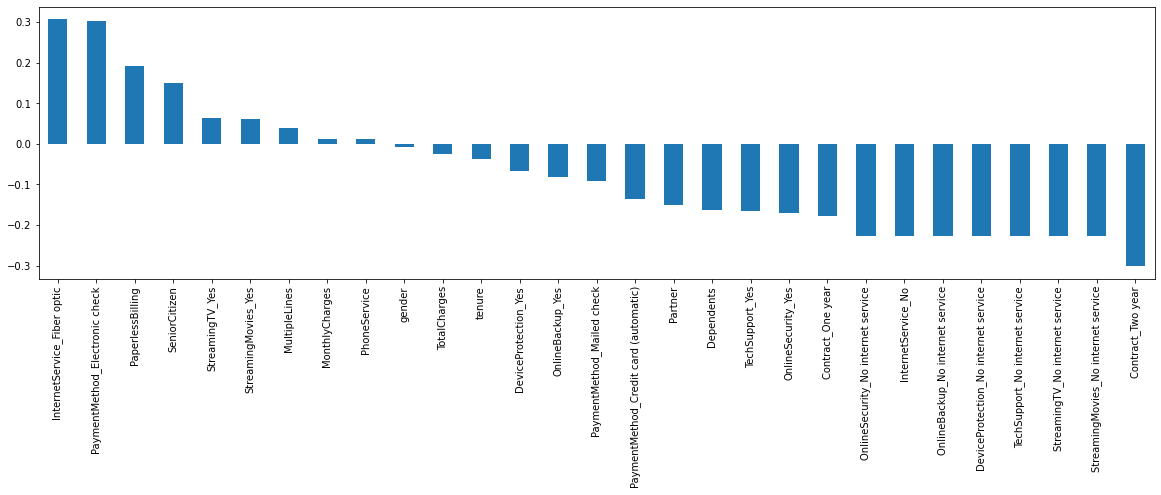

In [30]:
df.corr()['Churn'].sort_values(ascending  = False)[1:].plot(kind = 'bar' , figsize =  (20,5))

In [43]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score , classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [44]:
X= df.drop('Churn' , 1)
y = df['Churn']

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.33 , random_state = 42)

In [49]:
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

0.7941303409581355

In [50]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1725
           1       0.61      0.55      0.58       592

    accuracy                           0.79      2317
   macro avg       0.73      0.72      0.72      2317
weighted avg       0.79      0.79      0.79      2317



In [51]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_lr_smote=LogisticRegression()

In [52]:
model_lr_smote.fit(Xr_train,yr_train)
yr_predict = model_lr_smote.predict(Xr_test)
model_score_r = model_lr_smote.score(Xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.920284135753749
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       539
           1       0.92      0.95      0.93       728

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



**precision , recall , f1-score is very good for class 0 i.e not churned customers becasue we have 73% data of 0 class.**
##### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

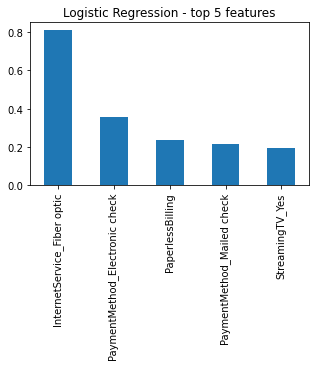

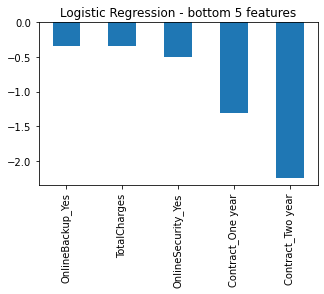

In [122]:
def feature_weights(classifier_obj , X_df, model_name , num_features):
    weights = pd.Series(classifier_obj.coef_[0] , index = X_df.columns).sort_values(ascending = False)
    fig , ax = plt.figure(figsize = (5,3))
    top_weights = weights[0:num_features].plot(kind = 'bar')
    plt.title('{} - top {} features'.format(model_name , num_features))
    plt.figure(figsize = (5,3))
    bottom_weights = weights[-num_features:].plot(kind = 'bar')
    plt.title('{} - bottom {} features'.format(model_name , num_features))

#     print(bottom_weights)
    return 
#     return weights
feature_weights(model_lr , X , 'Logistic Regression',5)

<AxesSubplot:>

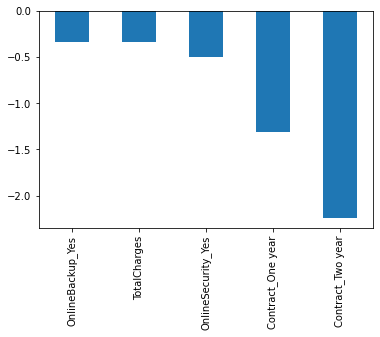

In [117]:
pd.Series(model_lr.coef_[0] , index = X.columns).sort_values(ascending = False)[-5:].plot(kind = 'bar')

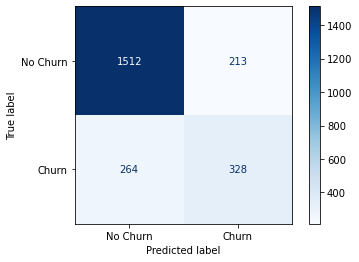

In [88]:
plot_confusion_matrix(model_lr , X_test , y_test , display_labels = ['No Churn' , 'Churn'] , cmap = 'Blues')

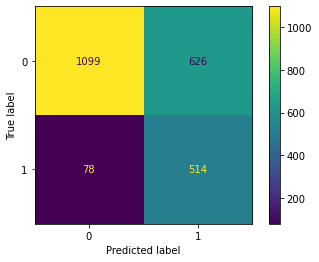

In [70]:
plot_confusion_matrix(model_lr_smote , X_test , y_test , display)l 

In [53]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [54]:
model_dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [55]:
y_pred = model_dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
model_dt.score(X_test , y_test)

0.7837721191195511

In [57]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1725
           1       0.59      0.51      0.55       592

    accuracy                           0.78      2317
   macro avg       0.71      0.69      0.70      2317
weighted avg       0.78      0.78      0.78      2317



##### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [68]:
from sklearn.metrics import plot_confusion_matrix

In [59]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [60]:
model_dt_smote.fit(Xr_train,yr_train)
yr_predict = model_dt_smote.predict(Xr_test)
model_score_r = model_dt_smote.score(Xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9079365079365079
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       538
           1       0.91      0.93      0.92       722

    accuracy                           0.91      1260
   macro avg       0.91      0.90      0.91      1260
weighted avg       0.91      0.91      0.91      1260



In [61]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[470  68]
 [ 48 674]]


In [ ]:
plot_confusion_matrix(model_ , X_test , y_test) 

In [62]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train , y_train)
model_rf.score(X_test , y_test)

0.7854984894259819

In [63]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1725
           1       0.59      0.51      0.55       592

    accuracy                           0.78      2317
   macro avg       0.71      0.69      0.70      2317
weighted avg       0.78      0.78      0.78      2317



In [64]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_rf_smote=RandomForestClassifier()

In [65]:
model_rf_smote.fit(Xr_train,yr_train)
yr_predict = model_rf_smote.predict(Xr_test)
model_score_r = model_rf_smote.score(Xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9529780564263323
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       541
           1       0.95      0.97      0.96       735

    accuracy                           0.95      1276
   macro avg       0.95      0.95      0.95      1276
weighted avg       0.95      0.95      0.95      1276



In [66]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[502  39]
 [ 21 714]]


###### With RF Classifier, also we are able to get very good results, infact better than Decision Tree.
###### Accuracy is 93% and its also working fine with minority clsss
###### let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

<font color = 'green'>**we are getting 85% accuracy score with random forest on our churn_test data . its also giving quite good result with minority class than other model**</font>

In [67]:
sorted_idx = load_model.feature_importances_.argsort()
plt.figure(figsize = (15,20))
plt.barh(df.columns[sorted_idx], load_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

NameError: name 'load_model' is not defined